## Question 1

给定一个含有 n 个正整数的数组和一个正整数 s ，找出该数组中满足其和 ≥ s 的长度最小的 连续 子数组，并返回其长度。如果不存在符合条件的子数组，返回 0 

示例：
输入：s = 7, nums = [2,3,1,2,4,3]
输出：2
解释：子数组 [4,3] 是该条件下的长度最小的子数组。

from: https://mp.weixin.qq.com/s/UrZynlqi4QpyLlLhBPglyg

In [10]:
nums = []
while True:
    try:
        numbers = int(input("enter a positive integer: "))
        nums.append(numbers)
    except:
        break

s = int(input("Give another positive integer: "))
summe = 0
result = 1000000
j = 0

for i in range(len(nums)):
    summe += nums[i]
    while summe>= s:
        sublength = (i-j+1)
        result = sublength if sublength<result else result
        summe -= nums[j]
        j += 1

result = 0 if result > len(nums) else result
print (result)  
    

enter a positive integer: 4
enter a positive integer: 2
enter a positive integer: 67
enter a positive integer: 3
enter a positive integer: 8
enter a positive integer: 1
enter a positive integer: 
Give another positive integer: 69
2


## Question 2

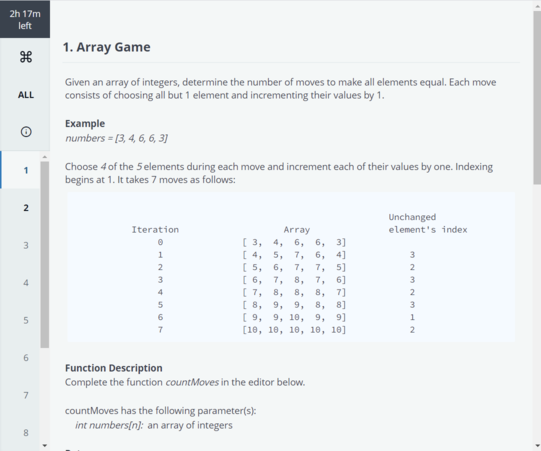

In [11]:
numbers = [5,6,8,8,5]
count = 0
t = 1

while t:
    n = numbers.index(max(numbers))
    for i in range(len(numbers)):
        if i != n:
            numbers[i] += 1
    count += 1
    if numbers.count(numbers[0]) == len(numbers):
        t = 0

print (count)


7


## Question 3: Sorting Algorithms
### Bubble Sort

冒泡排序对n个数据操作n-1轮，每轮找出一个最大（小）值。

操作只对相邻两个数比较与交换，每轮会将一个最值交换到数据列首（尾），像冒泡一样。

每轮操作O(n)次，共O(n)轮，时间复杂度O(n^2)。

额外空间开销出在交换数据时那一个过渡空间，空间复杂度O(1)

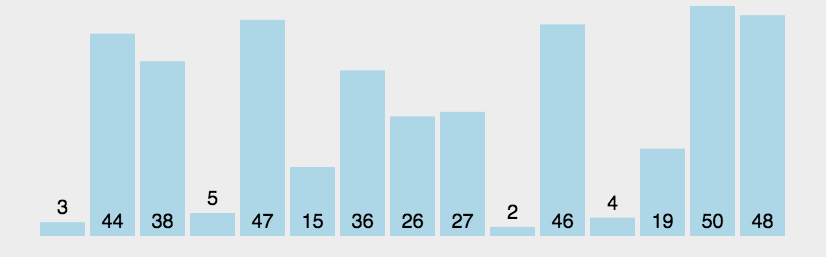

In [11]:
def BubbleSort(lst):
    n=len(lst)
    if n<=1:
        return lst
    for i in range (0,n):
        for j in range(0,n-i-1):
            if lst[j]>lst[j+1]:
                (lst[j],lst[j+1])=(lst[j+1],lst[j])
    return lst

a = [3, 1, -1, 0, 2, 5]
a = BubbleSort(a)

assert a == [-1, 0, 1, 2, 3, 5]

### Quick sort
worst case: already sorted or a lot repetitive numbers → O(n^2)

best case: the pivot we chose each round is the (cloest number to) median → O(nlogn)

average case: O(nlogn) #没说怎么证明

算法的整体性能取决于划分的平均程度，即基准值的选择，此处衍生出快速排序的许多优化方案，甚至可以划分为多块。

基准值若能把数据分为平均的两块，划分次数O(logn)，每次划分遍历比较一遍O(n)，时间复杂度O(nlogn)。→ Best case 

额外空间开销出在暂存基准值，O(logn)次划分需要O(logn)个，空间复杂度O(logn)

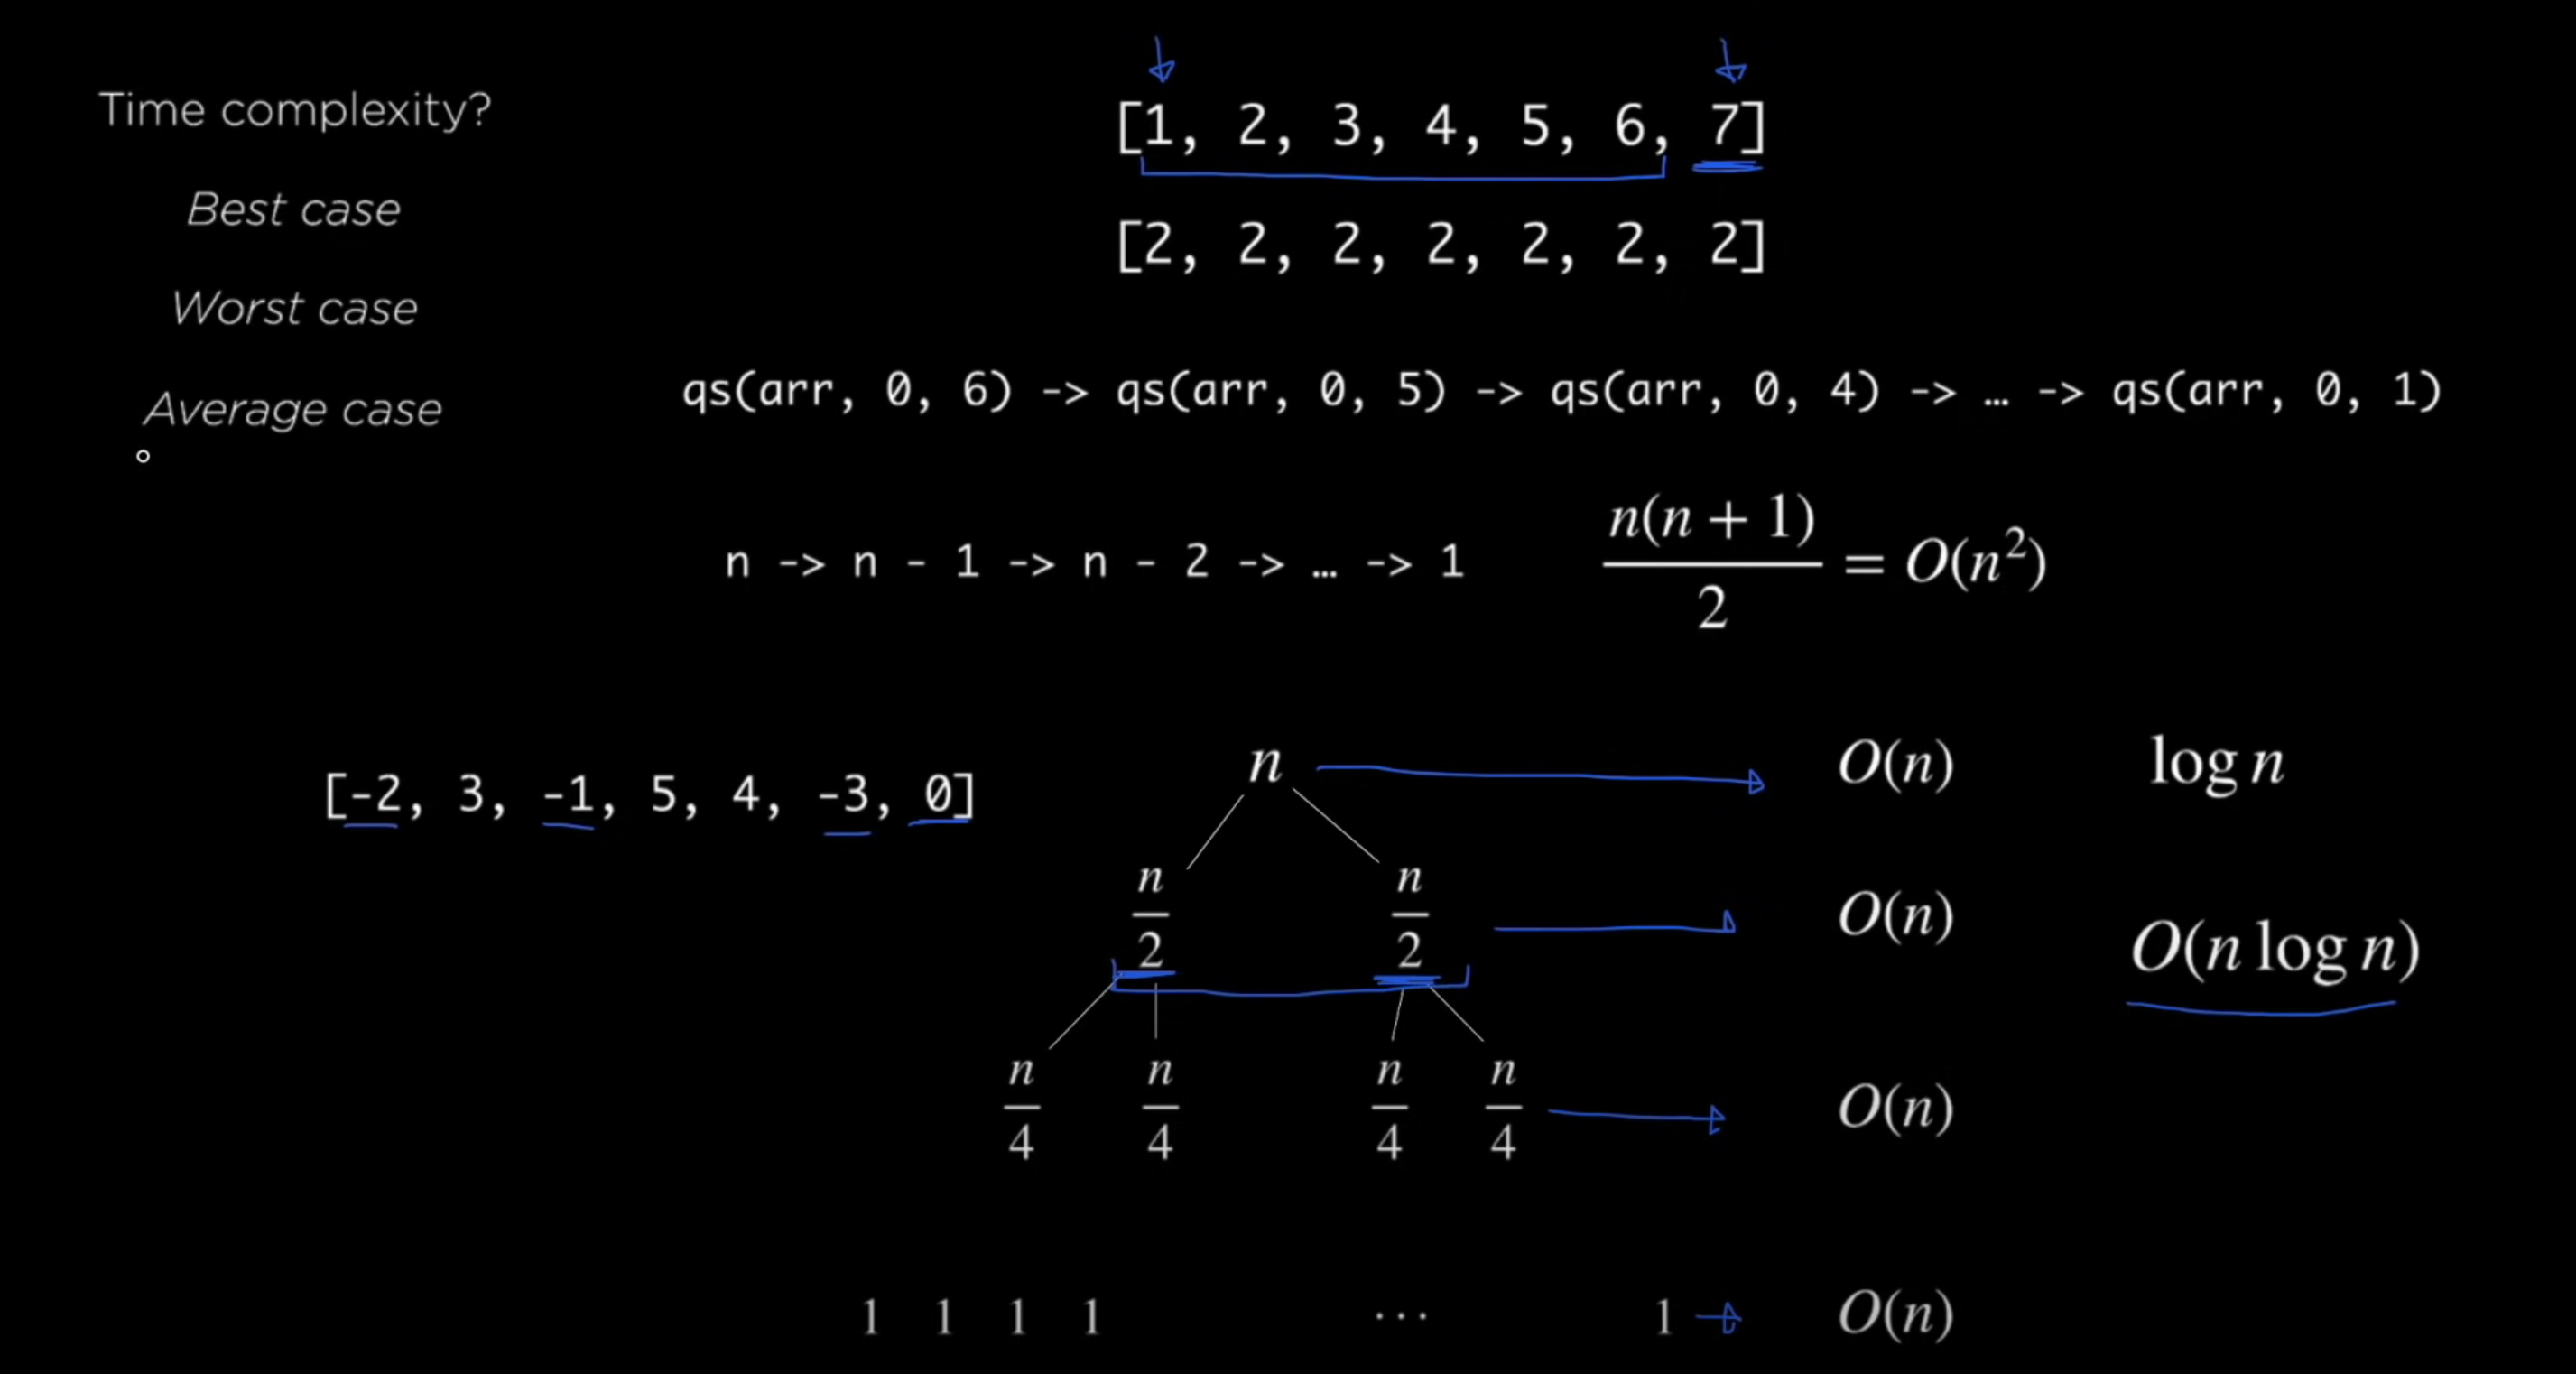

#### Implementation suggestion
Choosing pivot:
1. random element
2. Median of a random subset of the arr with 3 elements → lowers the probability of choosing a bad pivot

Dealing with duplicates
1. 3-way quicksort (划分为三块，< = >)


In [1]:
def quicksort(arr):
    qs(arr,0,len(arr)-1) #左指针=第一个数 右指针=最后一个数
    
def qs(arr,l,r):
    if l >= r:
        return arr
    p = partition(arr, l, r) #找到列表参照数的index，继续qs中位数左右两侧的数字
    qs(arr,l,p-1)
    qs(arr,p+1,r)
    
def partition(arr,l,r): #如何找到参照数的正确坐标
    pivot=arr[r] #简单的做法是默认列表最后一个数为参照数
    i = l-1
    for j in range(l,r): #j从列表的第一个数开始走到最后一个数，最后结果是[0~i]之间的数<参照数，(1~j]之间的数>参照数
        if arr[j]<pivot: #如果某数字<参照数
            i+=1 #[0~i]的范围增加1
            arr[i], arr[j] = arr[j], arr[i] #把>参照数的数字放到(1~j]，把<参照数的数字放到[0~i]
    arr[i + 1], arr[r] = arr[r], arr[i + 1] #把参照数放到小于自己的数和大于自己的数之间
    return i+1 #返回参照数的坐标，此时参照数的位置是正确的

a = [3, 1, -1, 0, 2, 5]
quicksort(a)

assert a == [-1, 0, 1, 2, 3, 5]


### Insert sort
简单插入排序同样操作n-1轮，每轮将一个未排序树插入排好序列。

开始时默认第一个数有序，将剩余n-1个数逐个插入。插入操作具体包括：比较确定插入位置，数据移位腾出合适空位

每轮操作O(n)次，共O（n）轮，时间复杂度O(n^2)。

额外空间开销出在数据移位时那一个过渡空间，空间复杂度O(1)。

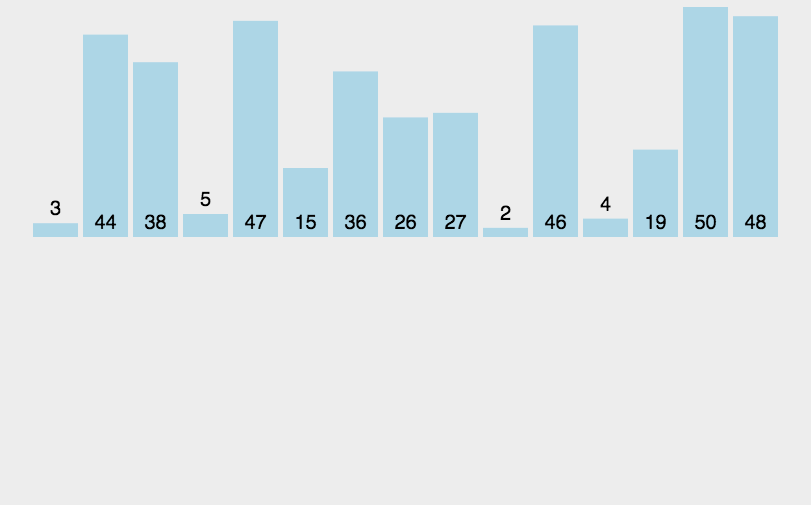

In [12]:
def InsertSort(lst):
    n=len(lst)
    if n<=1:
        return lst
    for i in range(1,n):
        j=i
        target=lst[i]            #每次循环的一个待插入的数
        while j>0 and target<lst[j-1]:       #比较、后移，给target腾位置
            lst[j]=lst[j-1]
            j=j-1
        lst[j]=target            #把target插到空位
    return lst
 
a = [3,5,7,9,2,5,1,6]
a = InsertSort(a)

assert a == [1,2,3,5,5,6,7,9]

### Shell Sort
希尔排序是插入排序的高效实现（大家可以比对一下插入排序和希尔排序的代码），对简单插入排序减少移动次数优化而来。

简单插入排序每次插入都要移动大量数据，前后插入时的许多移动都是重复操作，若一步到位移动效率会高很多。

若序列基本有序，简单插入排序不必做很多移动操作，效率很高。

希尔排序将序列按固定间隔划分为多个子序列，在子序列中简单插入排序，先做远距离移动使序列基本有序；逐渐缩小间隔重复操作，最后间隔为1时即简单插入排序。

希尔排序对序列划分O(n)次，每次简单插入排序O(logn)，时间复杂度O(nlogn)

额外空间开销出在插入过程数据移动需要的一个暂存，空间复杂度O(1)

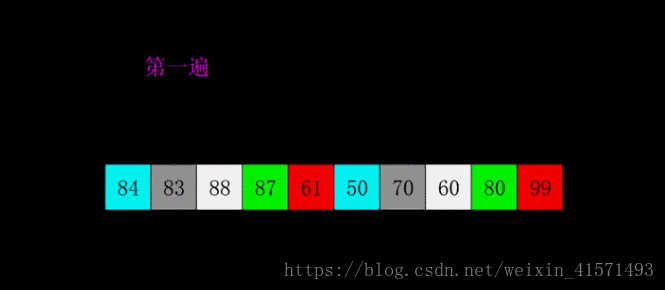

In [32]:
def ShellSort(lst):
    def shellinsert(arr,d):
        n=len(arr)
        print("d:" ,d)
        for i in range(d,n):       #右侧数的index
            j=i-d       #左侧数的index
            temp=arr[i]             #选中右侧数字 存入temp
            print(j,i,d)
            while(j>=0 and arr[j]>temp):    #当左侧数>右侧数时，
                print(arr[j],arr[i])
                arr[i],arr[j]= arr[j],arr[i]            #把左侧数字向右移动至右侧数字index，替换原数字
            print(lst)
            
            当前问题：进入间隔为1时insertion sort只compare了左右两个数，但不会比较temp前所有的数

    n=len(lst)
    if n<=1:
        return lst
    d=n//2
    while d>=1:
        shellinsert(lst,d)
        d=d//2
    return lst

a = [3,5,7,9,2,5,1,6]
a = ShellSort(a)
print("\na:", a)

#assert a == [1,2,3,5,5,6,7,9]

d: 4
0 4 4
3 2
[2, 5, 7, 9, 3, 5, 1, 6]
1 5 4
[2, 5, 7, 9, 3, 5, 1, 6]
2 6 4
7 1
[2, 5, 1, 9, 3, 5, 7, 6]
3 7 4
9 6
[2, 5, 1, 6, 3, 5, 7, 9]
d: 2
0 2 2
2 1
[1, 5, 2, 6, 3, 5, 7, 9]
1 3 2
[1, 5, 2, 6, 3, 5, 7, 9]
2 4 2
[1, 5, 2, 6, 3, 5, 7, 9]
3 5 2
6 5
[1, 5, 2, 5, 3, 6, 7, 9]
4 6 2
[1, 5, 2, 5, 3, 6, 7, 9]
5 7 2
[1, 5, 2, 5, 3, 6, 7, 9]
d: 1
0 1 1
[1, 5, 2, 5, 3, 6, 7, 9]
1 2 1
5 2
[1, 2, 5, 5, 3, 6, 7, 9]
2 3 1
[1, 2, 5, 5, 3, 6, 7, 9]
3 4 1
5 3
[1, 2, 5, 3, 5, 6, 7, 9]
4 5 1
[1, 2, 5, 3, 5, 6, 7, 9]
5 6 1
[1, 2, 5, 3, 5, 6, 7, 9]
6 7 1
[1, 2, 5, 3, 5, 6, 7, 9]

a: [1, 2, 5, 3, 5, 6, 7, 9]


In [33]:
def ShellSort(lst):
    def shellinsert(arr,d):
        n=len(arr)
        for i in range(d,n):
            j=i-d
            temp=arr[i]             #记录要出入的数
            while(j>=0 and arr[j]>temp):    #从后向前，找打比其小的数的位置
                arr[j+d]=arr[j]                 #向后挪动
                j-=d
            if j!=i-d:
                arr[j+d]=temp
    n=len(lst)
    if n<=1:
        return lst
    d=n//2
    while d>=1:
        shellinsert(lst,d)
        d=d//2
    return lst
 
a = [3,5,7,9,2,5,1,6]
a = ShellSort(a)

assert a == [1,2,3,5,5,6,7,9]

### Select Sort
简单选择排序同样对数据操作n-1轮，每轮找出一个最大（小）值。

操作指选择，即未排序数逐个比较交换，争夺最值位置，每轮将一个未排序位置上的数交换成已排序数，即每轮选一个最值。

每轮操作O(n)次，共O（n）轮，时间复杂度O(n^2)。

额外空间开销出在交换数据时那一个过渡空间，空间复杂度O(1)。

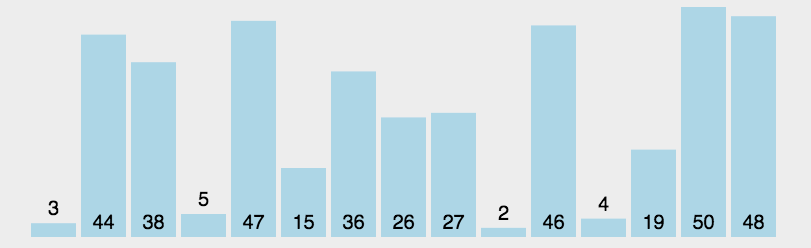

表现最稳定的排序算法之一，因为无论什么数据进去都是O(n2)的时间复杂度，所以用到它的时候，数据规模越小越好。唯一的好处可能就是不占用额外的内存空间了吧。理论上讲，选择排序可能也是平时排序一般人想到的最多的排序方法了吧。

In [35]:
def SelectSort(lst):
    n=len(lst)
    if n<=1:
        return lst
    for i in range(0,n-1):
        minIndex=i
        for j in range(i+1,n):          #比较一遍，记录索引不交换
            if lst[j]<lst[minIndex]:
                minIndex=j
        if minIndex!=i:                     #按索引交换
            (lst[minIndex],lst[i])=(lst[i],lst[minIndex])
    return lst

a = [3,5,7,9,2,5,1,6]
a = SelectSort(a)

assert a == [1,2,3,5,5,6,7,9]

### Heap Sort 代码看不懂

堆排序（Heapsort）是指利用堆这种数据结构所设计的一种排序算法。堆积是一个近似完全二叉树的结构，并同时满足堆积的性质：即子结点的键值或索引总是小于（或者大于）它的父节点。

1. 将初始待排序关键字序列(R1,R2….Rn)构建成大顶堆，此堆为初始的无序区；
3. 将堆顶元素R[1]与最后一个元素R[n]交换，此时得到新的无序区(R1,R2,……Rn-1)和新的有序区(Rn),且满足R[1,2…n-1]<=R[n]；
3. 由于交换后新的堆顶R[1]可能违反堆的性质，因此需要对当前无序区(R1,R2,……Rn-1)调整为新堆，然后再次将R[1]与无序区最后一个元素交换，得到新的无序区(R1,R2….Rn-2)和新的有序区(Rn-1,Rn)。不断重复此过程直到有序区的元素个数为n-1，则整个排序过程完成。

堆排序的初始建堆过程比价复杂，对O(n)级别个非叶子节点进行堆调整操作O(logn)，时间复杂度O(nlogn)；之后每一次堆调整操作确定一个数的次序，时间复杂度O(nlogn)。合起来时间复杂度O(nlogn)

额外空间开销出在调整堆过程，根节点下移交换时一个暂存空间，空间复杂度O(1)

In [39]:
def HeapSort(lst):
    def heapadjust(arr,start,end):  #将以start为根节点的堆调整为大顶堆
        temp=arr[start]
        son=2*start+1
        while son<=end:
            if son<end and arr[son]<arr[son+1]:  #找出左右孩子节点较大的
                son+=1
            if temp>=arr[son]:       #判断是否为大顶堆
                break
            arr[start]=arr[son]     #子节点上移
            start=son                     #继续向下比较
            son=2*son+1
        arr[start]=temp             #将原堆顶插入正确位置
#######
    n=len(lst)
    if n<=1:
        return lst
    #建立大顶堆
    root=n//2-1    #最后一个非叶节点（完全二叉树中）
    while(root>=0):
        heapadjust(lst,root,n-1)
        root-=1
    #掐掉堆顶后调整堆
    i=n-1
    while(i>=0):
        (lst[0],lst[i])=(lst[i],lst[0])  #将大顶堆堆顶数放到最后
        heapadjust(lst,0,i-1)    #调整剩余数组成的堆
        i-=1
    return lst


a = [3,5,7,9,2,5,1,6]
a = HeapSort(a)

assert a == [1,2,3,5,5,6,7,9]

### Two-way Merge Sort

堆排序（Heapsort）是指利用堆这种数据结构所设计的一种排序算法。堆积是一个近似完全二叉树的结构，并同时满足堆积的性质：即子结点的键值或索引总是小于（或者大于）它的父节点。

1. 将初始待排序关键字序列(R1,R2….Rn)构建成大顶堆，此堆为初始的无序区；
3. 将堆顶元素R[1]与最后一个元素R[n]交换，此时得到新的无序区(R1,R2,……Rn-1)和新的有序区(Rn),且满足R[1,2…n-1]<=R[n]；
3. 由于交换后新的堆顶R[1]可能违反堆的性质，因此需要对当前无序区(R1,R2,……Rn-1)调整为新堆，然后再次将R[1]与无序区最后一个元素交换，得到新的无序区(R1,R2….Rn-2)和新的有序区(Rn-1,Rn)。不断重复此过程直到有序区的元素个数为n-1，则整个排序过程完成。

堆排序的初始建堆过程比价复杂，对O(n)级别个非叶子节点进行堆调整操作O(logn)，时间复杂度O(nlogn)；之后每一次堆调整操作确定一个数的次序，时间复杂度O(nlogn)。合起来时间复杂度O(nlogn)

额外空间开销出在调整堆过程，根节点下移交换时一个暂存空间，空间复杂度O(1)
#### Youtube说是O(n) space??

### Counting Sort

1. 找出待排序的数组中最大和最小的元素；
2. 统计数组中每个值为i的元素出现的次数，存入数组C的第i项；
3. 对所有的计数累加（从C中的第一个元素开始，每一项和前一项相加）；
4. 反向填充目标数组：将每个元素i放在新数组的第C(i)项，每放一个元素就将C(i)减去1。

计数数组的大小取决于待排数据取值范围，所以对数据有一定要求，否则空间开销无法承受。

计数排序只需遍历一次数据，在计数数组中记录，输出计数数组中有记录的下标，时间复杂度为O(n+k)。

额外空间开销即指计数数组，实际上按数据值分为k类（大小取决于数据取值），空间复杂度O(k)。

Stable

#### Youtube说是O(n+k) space??

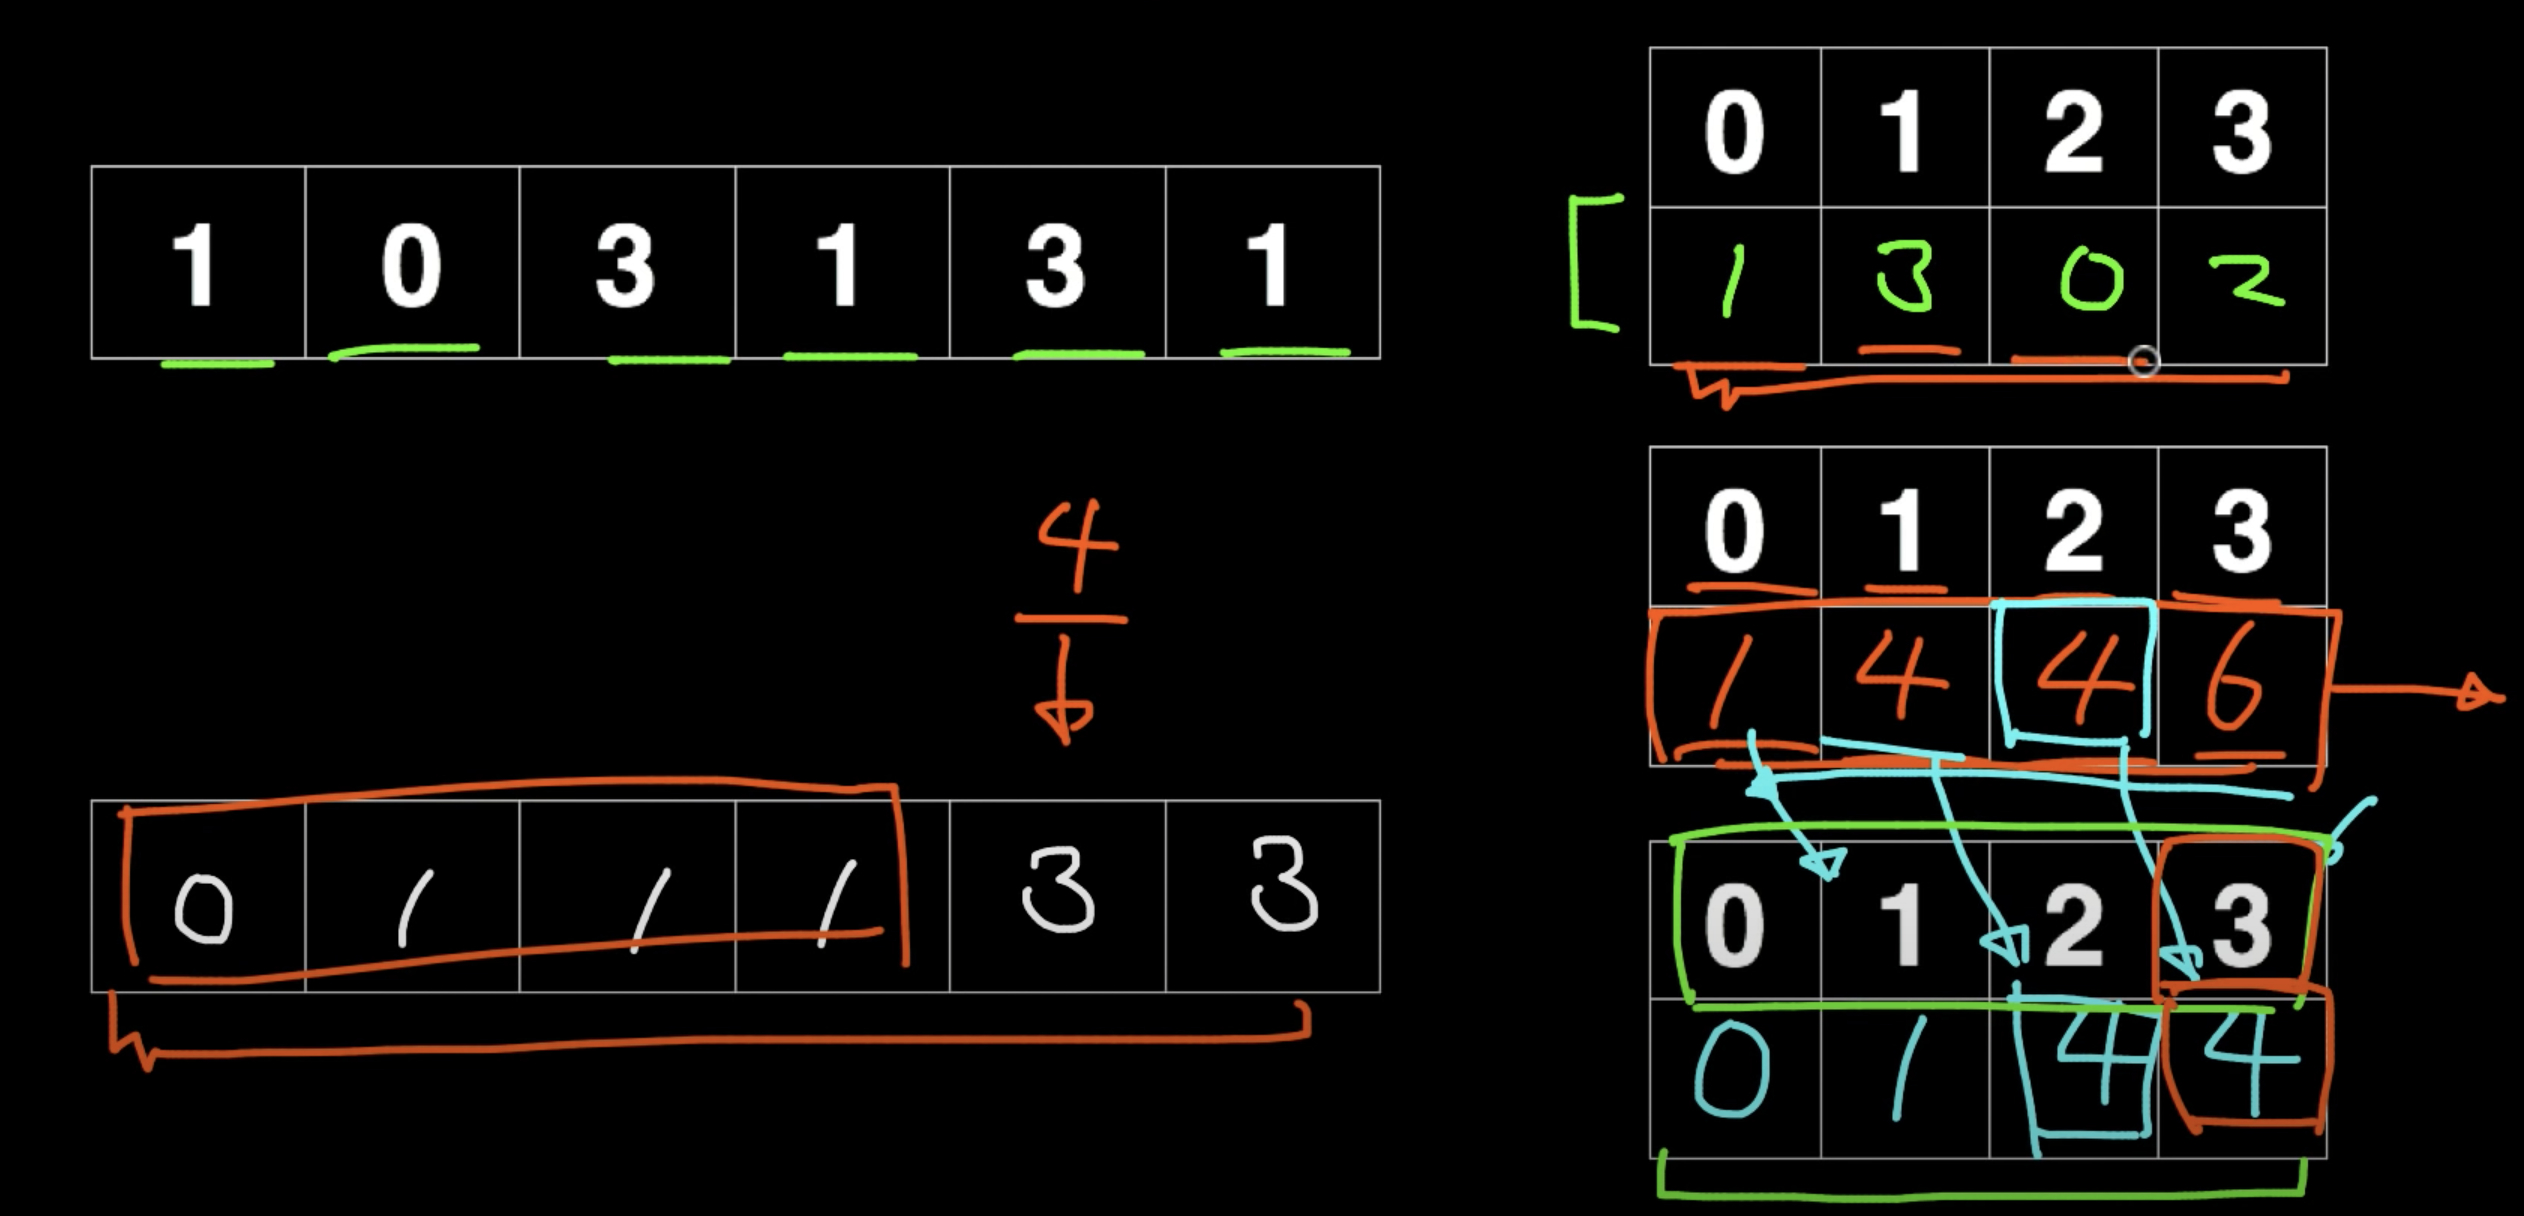



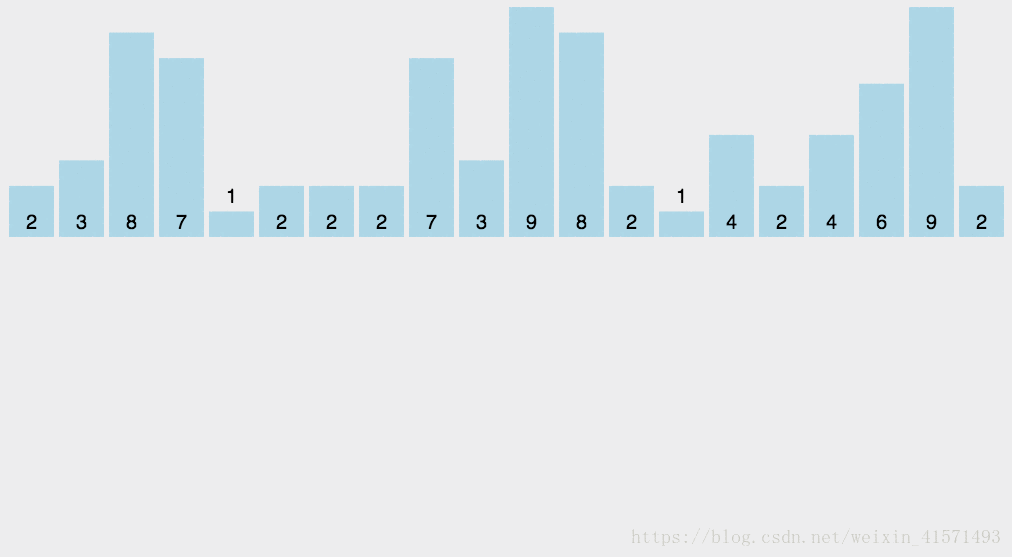

In [3]:
def CountSort(lst):
    n=len(lst)
    num=max(lst)
    count=[0]*(num+1)          #空白计数list
    for i in range(0,n):
        count[lst[i]]+=1
    #print ("count: ", count)
    arr=[]
    for i in range(0,num+1):
        for j in range(0,count[i]):
            arr.append(i)
            #print(arr)
    return arr

a = [3,5,7,9,2,5,1,6]
a = CountSort(a)

assert a == [1,2,3,5,5,6,7,9]

#这个代码的实现和描述中好像不太一样哇... 还会是stable吗？？

### Bucket Sort

1. 设置一个定量的数组当作空桶；
2. 遍历输入数据，并且把数据一个一个放到对应的桶里去；
3. 对每个不是空的桶进行排序；
4. 从不是空的桶里把排好序的数据拼接起来。 

桶排序实际上是计数排序的推广，但实现上要复杂许多。

桶排序先用一定的函数关系将数据划分到不同有序的区域（桶）内，然后子数据分别在桶内排序，之后顺次输出。

当每一个不同数据分配一个桶时，也就相当于计数排序。

假设n个数据，划分为k个桶，桶内采用快速排序，时间复杂度为O(n)+O(k * n/k *log(n/k))=O(n)+O(n*(log(n)-log(k))),

显然，k越大，时间复杂度越接近O(n)，当然空间复杂度O(n+k)会越大，这是空间与时间的平衡。

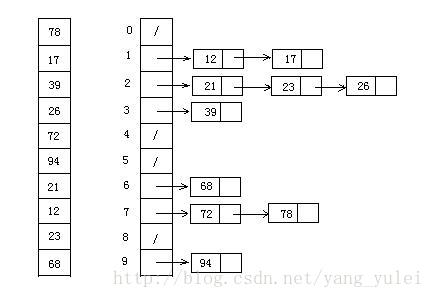


In [36]:
def BucketSort(lst):
    n=len(lst)
    big=max(lst)
    num=big//10+1        #In this case 10个桶
    bucket=[]
    buckets=[[] for i in range(0,num)]
    for i in lst:
        buckets[i//10].append(i)     #划分桶
    for i in buckets:                       #桶内排序
        bucket=quicksort(i)
        
    arr=[]
    for i in buckets:
        if isinstance(i, list):
            for j in i:
                arr.append(j)
        else:
            arr.append(i)
        print(arr)
    for i in range(0,n):
        lst[i]=arr[i]
    return lst

a = [78,17,39,26,72,94,21,12,23,68]
a = BucketSort(a)


assert a == [12,17,21,23,26,39,68,72,78,94]

[]
[12, 17]
[12, 17, 21, 23, 26]
[12, 17, 21, 23, 26, 39]
[12, 17, 21, 23, 26, 39]
[12, 17, 21, 23, 26, 39]
[12, 17, 21, 23, 26, 39, 68]
[12, 17, 21, 23, 26, 39, 68, 72, 78]
[12, 17, 21, 23, 26, 39, 68, 72, 78]
[12, 17, 21, 23, 26, 39, 68, 72, 78, 94]


### Radix Sort

1. 取得数组中的最大数，并取得位数；
2. arr为原始数组，从最低位开始取每个位组成radix数组；
3. 对radix进行计数排序（利用计数排序适用于小范围数的特点）；

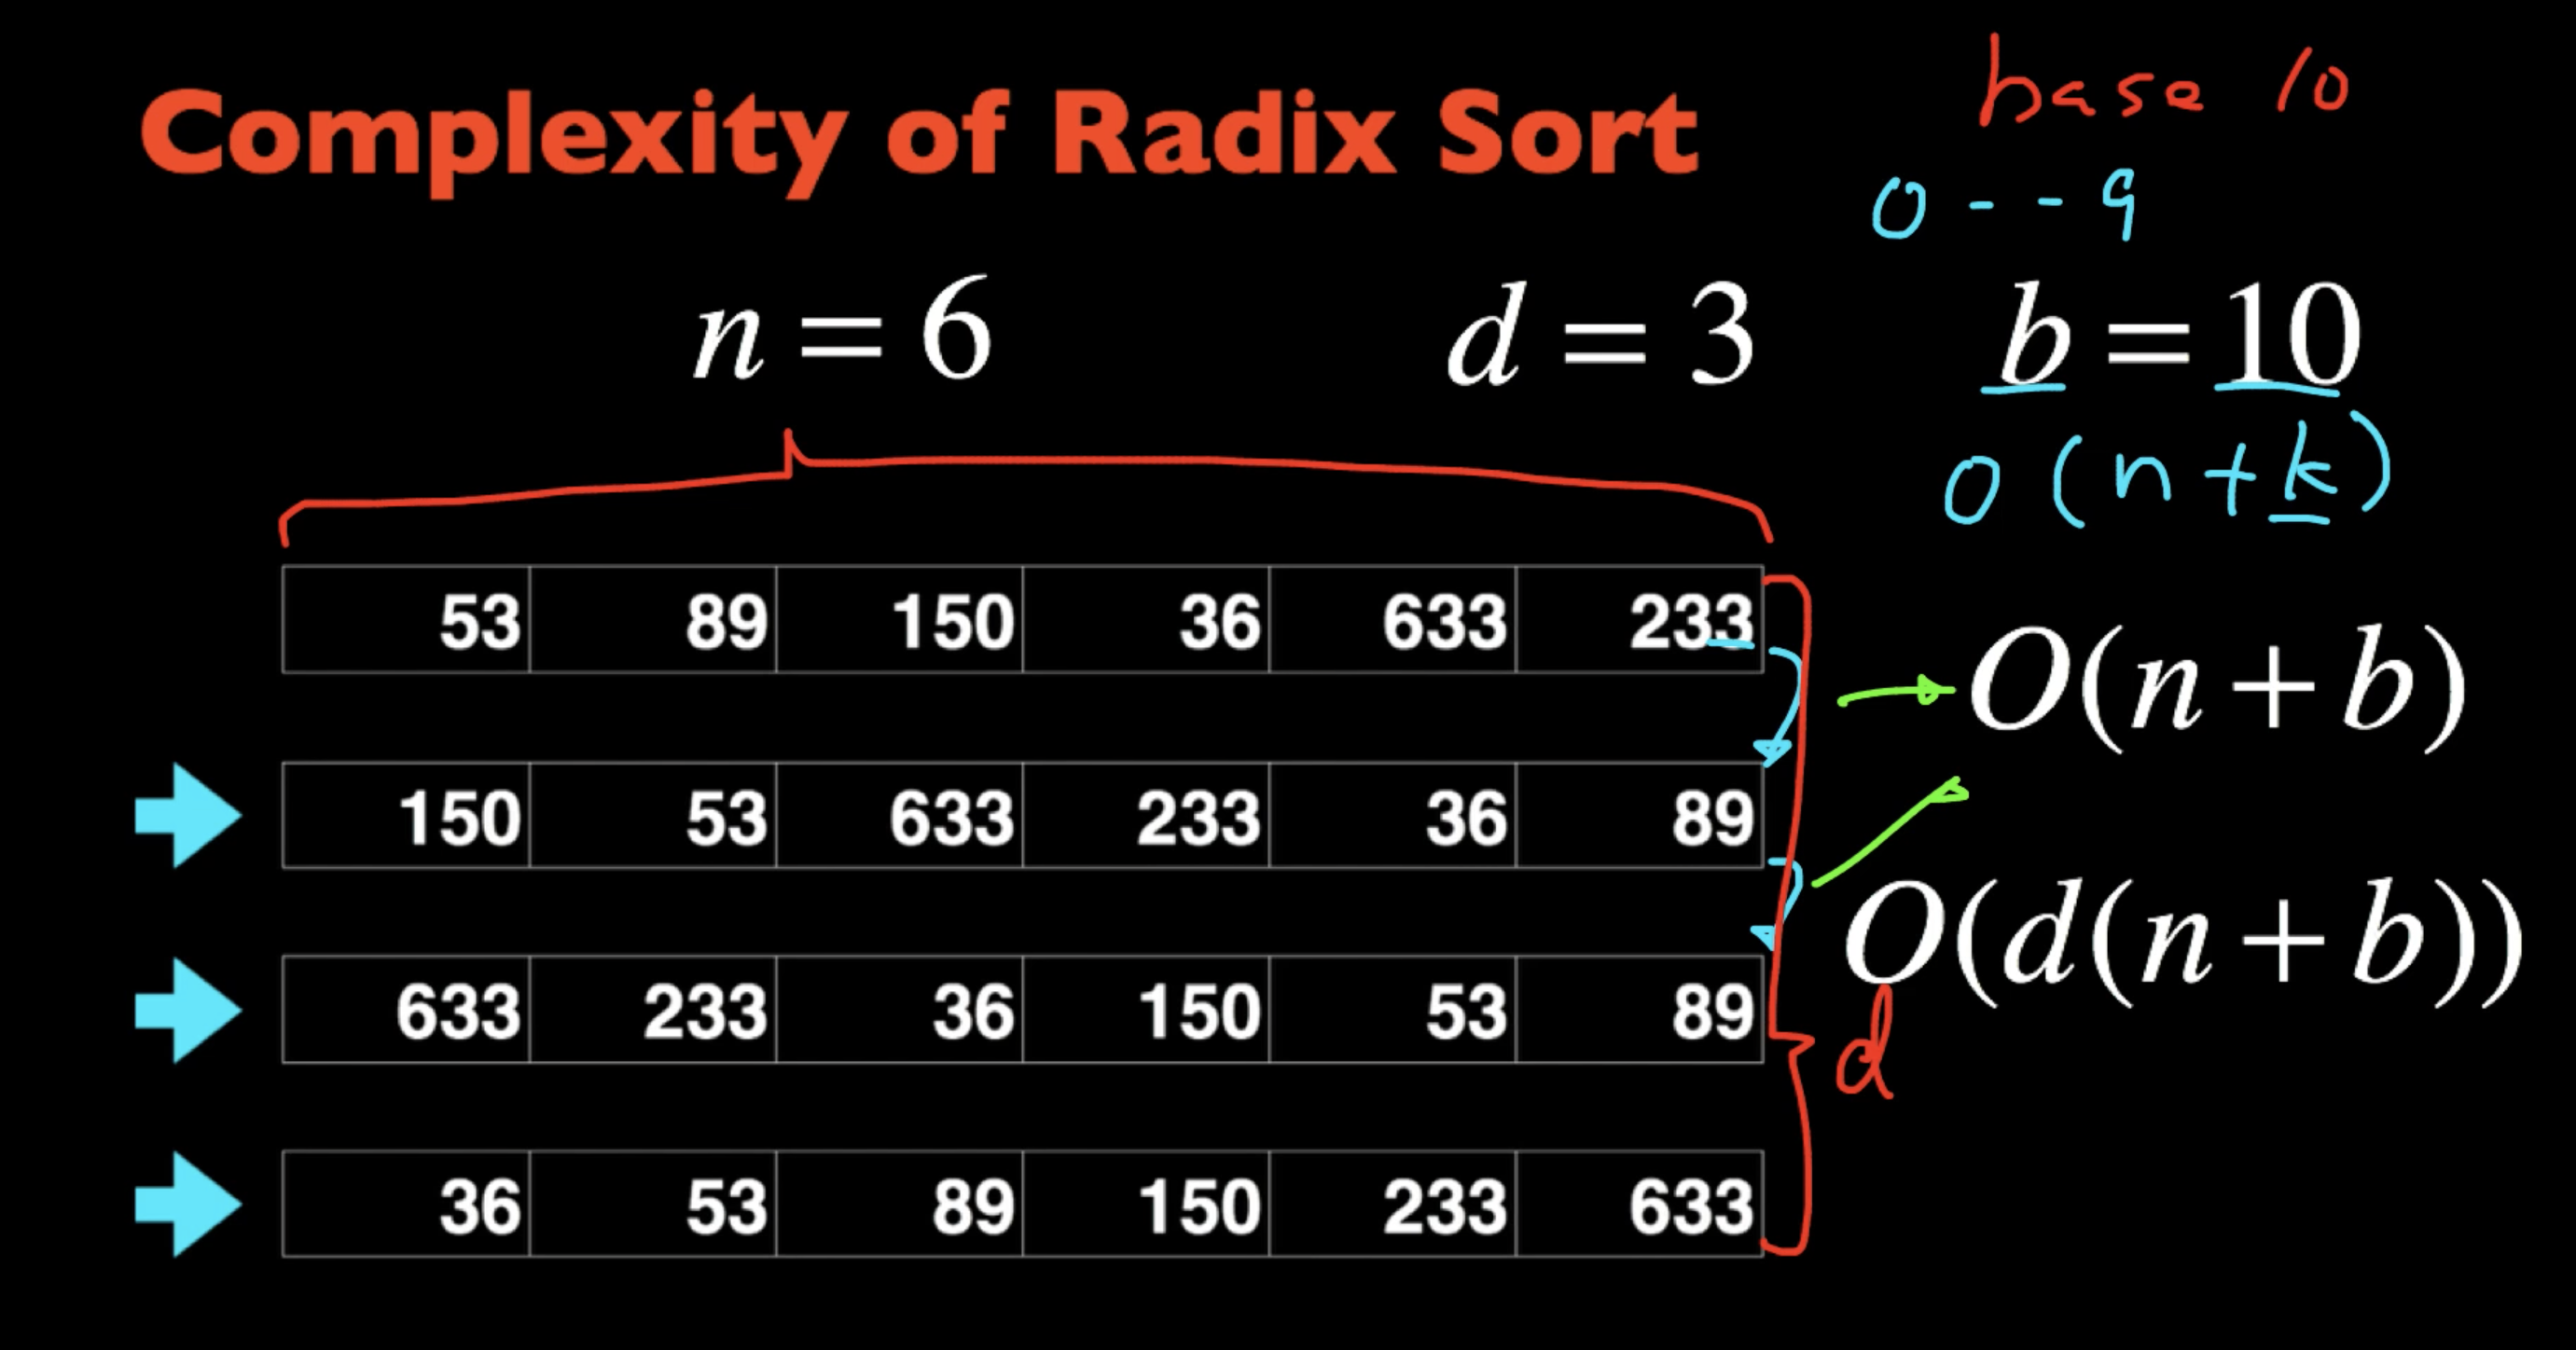

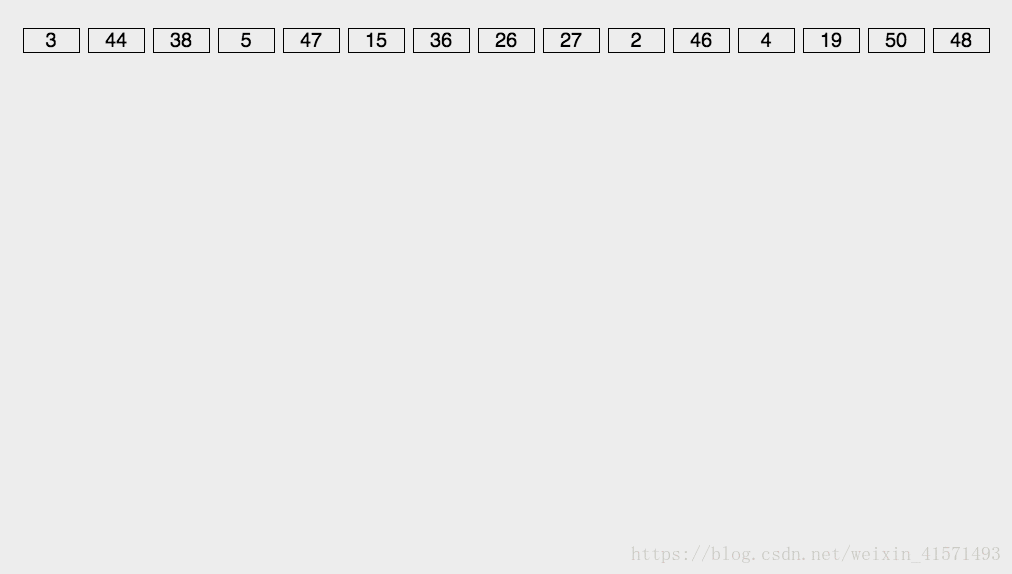

In [10]:

import math
def RadixSort(lst):
    def getbit(x,i):       #返回x的第i位（从右向左，个位为0）数值
        y=x//pow(10,i)
        z=y%10
        return z
    
    Max=max(lst)
    for k in range(0,int(math.log10(Max))+1):             #对k位数排k次,每次按某一位来排
        arr=[[] for i in range(0,10)]
        for i in lst:                 #将ls（待排数列）中每个数按某一位分类（0-9共10类）存到arr[][]二维数组（列表）中
            arr[getbit(i,k)].append(i)
        for i in range(0,10):         #对arr[]中每一类（一个列表）  按计数排序排好
            if len(arr[i])>0:
                arr[i]=CountSort(arr[i])
        j=9
        n=len(lst)
        for i in range(0,n):     #顺序输出arr[][]中数到ls中，即按第k位排好
            while len(arr[j])==0:
                j-=1
            else:
                lst[n-1-i]=arr[j].pop()
            print(j,lst)
    return lst    


a = [78,17,39,26,72,94,21,2,23,68]
a = RadixSort(a)

assert a == [2,17,21,23,26,39,68,72,78,94]

9 [78, 17, 39, 26, 72, 94, 21, 2, 23, 39]
8 [78, 17, 39, 26, 72, 94, 21, 2, 78, 39]
8 [78, 17, 39, 26, 72, 94, 21, 68, 78, 39]
7 [78, 17, 39, 26, 72, 94, 17, 68, 78, 39]
6 [78, 17, 39, 26, 72, 26, 17, 68, 78, 39]
4 [78, 17, 39, 26, 94, 26, 17, 68, 78, 39]
3 [78, 17, 39, 23, 94, 26, 17, 68, 78, 39]
2 [78, 17, 72, 23, 94, 26, 17, 68, 78, 39]
2 [78, 2, 72, 23, 94, 26, 17, 68, 78, 39]
1 [21, 2, 72, 23, 94, 26, 17, 68, 78, 39]
9 [21, 2, 72, 23, 94, 26, 17, 68, 78, 94]
7 [21, 2, 72, 23, 94, 26, 17, 68, 78, 94]
7 [21, 2, 72, 23, 94, 26, 17, 72, 78, 94]
6 [21, 2, 72, 23, 94, 26, 68, 72, 78, 94]
3 [21, 2, 72, 23, 94, 39, 68, 72, 78, 94]
2 [21, 2, 72, 23, 26, 39, 68, 72, 78, 94]
2 [21, 2, 72, 23, 26, 39, 68, 72, 78, 94]
2 [21, 2, 21, 23, 26, 39, 68, 72, 78, 94]
1 [21, 17, 21, 23, 26, 39, 68, 72, 78, 94]
0 [2, 17, 21, 23, 26, 39, 68, 72, 78, 94]
